# **Presentación**

Para realizar el proceso completo seguiremos la siguiente metodología:

![Image of Yaktocat](https://i.imgur.com/7BLdu1L.png)

# **0. Instalación de PyCaret**

In [1]:
"CELDA N°01"
#Instalamos el PyCaret en nuestro entorno de trabajo
!pip3 install pycaret

     |████████████████████████████████| 266kB 6.7MB/s 
     |████████████████████████████████| 14.2MB 274kB/s 
     |████████████████████████████████| 1.8MB 42.0MB/s 
     |████████████████████████████████| 276kB 44.4MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 1.7MB 41.2MB/s 
     |████████████████████████████████| 6.8MB 40.2MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 245kB 51.6MB/s 
     |████████████████████████████████| 215kB 52.2MB/s 
     |████████████████████████████████| 1.1MB 49.3MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 163kB 47.1MB/s 
     |████████████████████████████████| 153kB 27.8MB/s 
     |████████████████████████████████| 3.1MB 39.3MB/s 
     |████████████████████████████████| 1.1MB 36.1MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
 

In [2]:
"CELDA N°02"
#Habilitar los gráficos interactivos (utils) en Google Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **1. Lectura de Datos**

Utilizaremos el método **get_data** de PyCaret y seleccionaremos la **data previamente guardada en PyCaret relacionada a créditos** que se llama **'credit'**

In [3]:
"CELDA N°03"
#Importamos get_data para leer el archivo credit guardado en los dataset de PyCaret
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


Para realizar el entrenamiento del modelo utiizaremos el **95%** del dataset.

In [4]:
"CELDA N°04"
#Usamos el método sample para seleccionar la muestra que sí utilizaremos durante el entrenamiento
muestra = dataset.sample(frac=0.95, random_state=1)

Para realizar una posterior validación del modelo vamos a **reservar** un **5%** de la data.

In [5]:
"CELDA N°05"
#Usamos el método drop para quitar la muestra y solo quedarnos con el 5% restante
reserva = dataset.drop(muestra.index)

Reseteamos los índices de ambos dataframes y verificamos el resultado final.

In [6]:
"CELDA N°06"
#Usamos el método reset_index para resetear los índices y el método shape para una rápida verificación
muestra.reset_index(inplace=True, drop=True)
reserva.reset_index(inplace=True, drop=True)
muestra.shape, reserva.shape

((22800, 24), (1200, 24))

# **2. Seteando el Entorno de PyCaret**

Vamos a crear un **modelo supervisado** para predecir un target **binario** de **clasificación** de clientes para otorgar créditos en una financiera.

In [7]:
"CELDA N°07"
#Importamos todas las librerías relacionadas a clasificación en PyCaret
from pycaret.classification import *

Vamos a **setear** el modelo de clasificación. Los **parámetros** deben ser especificados según nuestras preferencias.

Atento durante la ejecución porque **demora algún tiempo y requiere alguna acción** del usuario para culminar el proceso. Ejemplo: presionar Enter.

Puede visualizar el detalle de todos los parámetros **de un modelo de clasificación en PyCaret** en esta [web](https://pycaret.readthedocs.io/en/latest/api/classification.html)


In [8]:
"CELDA N°08"
model_setup = setup(data=muestra, #especificar la variable donde está guardada la data total incluyendo el target
                    train_size = 0.85, #especificar el porcetaje de train, el resto será test
                    target='default', #especificar el nombre de la columna donde se ubica el target
                    session_id=1) #session_id es similar al random_state

,Description,Value
0,session_id,1
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


# **3. Comparar modelos**

Vamos a visualizar en una tabla **todos los modelos de clasificación** provistos por Pycaret y sus respectivas **métricas**.

Nuevamente existe una lista de parámetros que puede personalizar, sin embargo el **más importante** es fold para **definir el número de particiones** para KFolds durante la **validación cruzada**.

In [9]:
"CELDA N°09"
#Utilizamos la instrucción compare_models() de PyCaret para mostrar una tabla de comparación
tabla_comparativa = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8202,0.7646,0.3760,0.6771,0.4834,0.3851,0.4096,0.344
ridge,Ridge Classifier,0.8199,0.0000,0.3578,0.6879,0.4706,0.3749,0.4041,0.076
gbc,Gradient Boosting Classifier,0.8184,0.7783,0.3594,0.6779,0.4696,0.3723,0.3997,6.488
lightgbm,Light Gradient Boosting Machine,0.8178,0.7738,0.3774,0.6635,0.4810,0.3805,0.4029,0.484
ada,Ada Boost Classifier,0.8158,0.7699,0.3333,0.6812,0.4475,0.3522,0.3847,1.548
rf,Random Forest Classifier,0.8138,0.7611,0.3695,0.6475,0.4704,0.3676,0.3889,3.372
et,Extra Trees Classifier,0.8061,0.7384,0.3751,0.6086,0.4640,0.3537,0.3692,2.736
lr,Logistic Regression,0.7760,0.6433,0.0000,0.0000,0.0000,-0.0002,-0.0035,1.294
knn,K Neighbors Classifier,0.7475,0.5990,0.1743,0.3658,0.2360,0.1070,0.1176,2.116
dt,Decision Tree Classifier,0.7275,0.6177,0.4172,0.3969,0.4068,0.2301,0.2302,0.430


# **4. Crear el modelo**

Una vez haya evaluado las métricas debe seleccionar el modelo y guardarlo en una variable. Es importante **especificar el nombre exacto obtenido en la tabla comparativa de modelos**.

Adicionalmente podrá visualizar el **promedio y desviación estándar** de cada partición durante el entrenamiento.

Por default la instrucción **create_model** crea **10 particiones**. Nuevamente puede especificar **fold=** para cambiar este número.

In [10]:
"CELDA N°10"
#Creamos la variable modelo_boosting con el método create_model en base al modelo gbs
modelo_boosting = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8215,0.7927,0.3880,0.6747,0.4927,0.3938,0.4160
1,0.8194,0.7663,0.3341,0.7039,0.4531,0.3610,0.3970
2,0.8173,0.7795,0.3571,0.6739,0.4669,0.3690,0.3961
3,0.8189,0.7646,0.3571,0.6828,0.4690,0.3725,0.4009
4,0.8354,0.7939,0.4194,0.7309,0.5329,0.4418,0.4669
5,0.8148,0.7779,0.3502,0.6638,0.4585,0.3594,0.3862
6,0.8111,0.7795,0.3295,0.6560,0.4387,0.3398,0.3689
7,0.8194,0.7900,0.3940,0.6628,0.4942,0.3928,0.4125
8,0.8080,0.7591,0.3341,0.6360,0.4381,0.3356,0.3609
9,0.8291,0.7882,0.3788,0.7257,0.4977,0.4068,0.4380


Adicionalmente podemos visualizar la **lista de parámetros** del modelo.

Estos parámetros son escogidos después de ejecutar la tabla comparativa.

Puedes **modificar los parámetros** dentro de create_model()

In [11]:
"CELDA N°11"
#Visualizamos los parámetros del modelo con la instrucción print especificando la variable creada
print(modelo_boosting)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# **5. Mejorando el modelo**

PyCaret también permite **mejorar los hiperámetros del modelo**.

Para realizar esta tarea usa internamente el método **Random Grid Search**. Sin embargo, el usuario puede personalizar el método con el parámetro **custom_grid=**

También podemos cambiar el **objetivo de optimización** con el parámetro **optimize=**

In [12]:
"CELDA N°12"
#Visualizamos mejores valores de media y desviación de cada métrica con el modelo mejorado
boosting_mejorado = tune_model(modelo_boosting)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8209,0.7999,0.3972,0.6667,0.4978,0.3973,0.4170
1,0.8220,0.7645,0.3502,0.7070,0.4684,0.3758,0.4093
2,0.8168,0.7741,0.3687,0.6639,0.4741,0.3740,0.3977
3,0.8220,0.7664,0.3802,0.6846,0.4889,0.3916,0.4165
4,0.8344,0.7994,0.4217,0.7233,0.5328,0.4405,0.4642
5,0.8194,0.7809,0.3687,0.6780,0.4776,0.3798,0.4055
6,0.8111,0.7856,0.3272,0.6574,0.4369,0.3385,0.3683
7,0.8220,0.7928,0.4055,0.6692,0.5050,0.4044,0.4232
8,0.8086,0.7621,0.3387,0.6364,0.4421,0.3393,0.3639
9,0.8265,0.7848,0.3695,0.7175,0.4878,0.3960,0.4277


In [13]:
"CELDA N°13"
#Visualizamos los nuevos parámetros del modelo con la instrucción print
print(boosting_mejorado)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# **6. Gráficos del modelo**

## **6.1 Curva AUC**

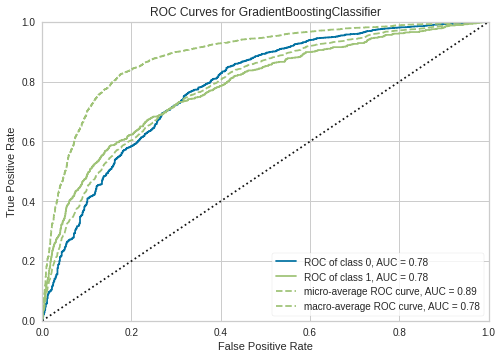

In [14]:
"CELDA N°14"
#Aplicamos la instrucción plot_model especificando el modelo mejorado y el parámetro plot = 'auc'
plot_model(boosting_mejorado, plot = 'auc')

## **6.2 Gráfica Precisión - Recall**

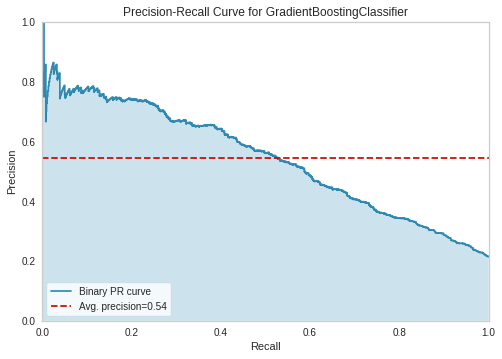

In [15]:
"CELDA N°15"
#Aplicamos la instrucción plot_model especificando el modelo mejorado y el parámetro plot = 'pr'
plot_model(boosting_mejorado, plot = 'pr')

## **6.3 Importancia de variables**

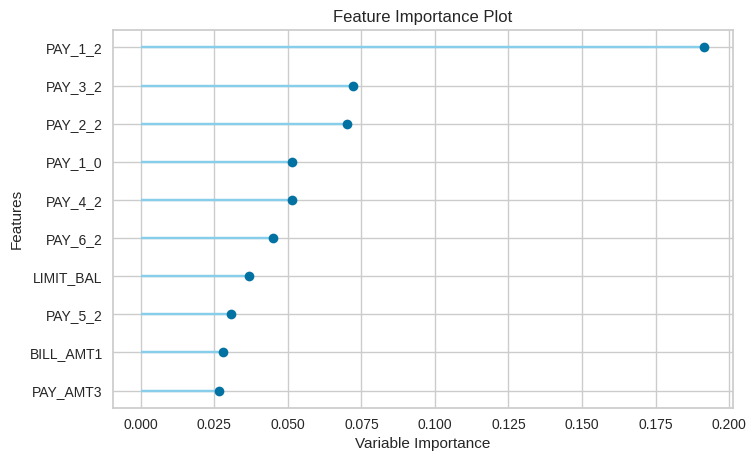

In [16]:
"CELDA N°16"
#Aplicamos la instrucción plot_model especificando el modelo mejorado y el parámetro plot = 'feature'
plot_model(boosting_mejorado, plot = 'feature')

## **6.4 Matriz de Confusión**

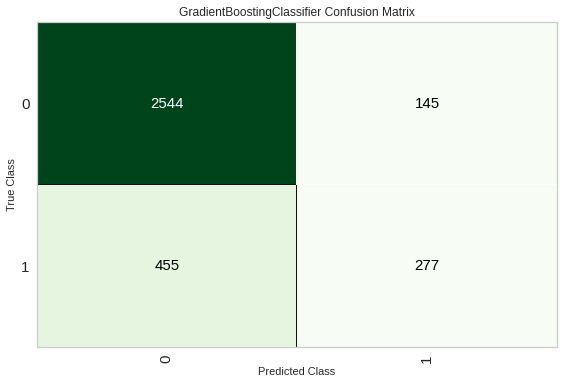

In [17]:
"CELDA N°17"
#Aplicamos la instrucción plot_model especificando el modelo mejorado y el parámetro plot = 'feature'
plot_model(boosting_mejorado, plot = 'confusion_matrix')

# **7. Evaluación del modelo**

Utilizando la instrucción **evaluate_model** podemos acceder a varias gráficas de forma interactiva **con solo un clic**.

Nuevamente es necesario especificar el modelo mejorado.

In [18]:
"CELDA N°18"
#Aplicamos la instrucción evaluate_model y podemos visualizar diversas gráficas
evaluate_model(boosting_mejorado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **8. Finalizar el modelo**

Una vez estemos **convencidos** que el modelo escogio y mejorado es el **adecuado para nuestro caso de estudio**, ahora podemos guardar el modelo en una nueva variable que denominamos **modelo_final**.

In [19]:
"CELDA N°19"
#Guardamos nuestra elección de modelo mejorado en la variable modelo_final con la instrucción finalize_model
modelo_final = finalize_model(boosting_mejorado)

# **9. Aplicamos el modelo para predecir**

Vamos a **añadir** dos nuevas columnas con la instrucción **predict_model**:
1. **Label:** Es el target generado a partir del modelo con la misma estructura que la columna target original.
2. **Score:** Es la probabilidad en  decimales (0 a 1) conque se obtiene el nuevo target.



In [20]:
"CELDA N°20"
#Generamos ambas columnas - target y score - a partir del modelo final
predict_model(modelo_final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8322,0.8211,0.3921,0.6899,0.5,0.4082,0.4318


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_-2,PAY_2_0,...,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,110000.0,25.0,103135.0,99731.0,101945.0,82873.0,68587.0,65648.0,4800.0,5000.0,4000.0,3000.0,2500.0,2600.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9142
1,230000.0,41.0,231187.0,231272.0,228653.0,225471.0,224853.0,230078.0,10500.0,10000.0,9000.0,8200.0,9000.0,9000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8866
2,160000.0,43.0,0.0,0.0,0.0,0.0,0.0,695.0,0.0,0.0,0.0,0.0,695.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7227
3,20000.0,37.0,16455.0,16511.0,18902.0,18768.0,18650.0,19175.0,1609.0,3000.0,663.0,676.0,834.0,782.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7998
4,20000.0,49.0,18769.0,21349.0,20732.0,19946.0,19546.0,19546.0,3186.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,120000.0,43.0,46889.0,47496.0,48307.0,49272.0,49016.0,43127.0,1856.0,1667.0,1632.0,1664.0,1880.0,1059.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8935
3417,20000.0,25.0,4120.0,5387.0,6440.0,7373.0,8246.0,11095.0,1500.0,1300.0,1200.0,1000.0,3000.0,406.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8261
3418,20000.0,54.0,10618.0,12135.0,16878.0,19624.0,20036.0,18309.0,2000.0,5000.0,3000.0,689.0,1000.0,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8649
3419,120000.0,34.0,64139.0,65430

# **10. Grabar modelo para cargar luego**

## **10.1 Grabar**

Con la instrucción **save_model** guardamos la variable **modelo_final** y especificamos el **nombre entre comillas**.

In [22]:
"CELDA N°21"
#Podemos guardar el modelo para cargarlo y utilizarlo en el futuro
save_model(modelo_final, 'Modelo_Final_javalillo_20210308')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                             learning_rate=0.05, loss='deviance',
                                             max_depth=4, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             mi

Ya está **guardado**! Ahora supongamos que han pasado varios días y queremos utilizar nuestro modelo para **añadir las predicciones** a partir de la **data reserva** que separamos al inicio.

## **10.2 Cargar**

Para cargar el modelo guardado usamos la instrucción **load_model** especificando **exactamente** el mismo nombre utilizado al guardar.

In [23]:
modelo_guardado = load_model('Modelo_Final_javalillo_20210308')

Transformation Pipeline and Model Successfully Loaded


## **10.3 Predecir**

Finalmente, vamos a utilizar **predict_model** y la data **reserva**.

Visualizar el resultado en las **nuevas columnas: Label y Score**.

In [24]:
predicciones_hoy = predict_model(modelo_guardado, data=reserva)
predicciones_hoy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5696
1,70000,2,2,2,26,2,0,0,2,2,2,41087.0,42445.0,45020.0,44006.0,46905.0,46012.0,2007.0,3582.0,0.0,3601.0,0.0,1820.0,1,1,0.7939
2,90000,1,1,2,23,0,0,0,-1,0,0,4744.0,7070.0,0.0,5398.0,6360.0,8292.0,5757.0,0.0,5398.0,1200.0,2045.0,2000.0,0,0,0.8983
3,500000,2,2,1,54,-2,-2,-2,-2,-2,-2,10929.0,4152.0,22722.0,7521.0,71439.0,8981.0,4152.0,22827.0,7521.0,71439.0,981.0,51582.0,0,0,0.9503
4,160000,1,1,2,30,-1,-1,-2,-2,-2,-1,30265.0,-131.0,-527.0,-923.0,-1488.0,-1884.0,131.0,396.0,396.0,565.0,792.0,0.0,0,0,0.8598
